# **Week 2. Supervised Learning**

2주차 과제는 지도학습의 회귀, 분류 모델을 학습-평가하는 과정을 간소하게 재현한 코드입니다.

1. 적힌 코드를 따라가며, 배운 내용과 어떻게 연관되는지 등을 생각하거나 찾아본 후, 주석으로 달아주시면 좋을 것 같습니다.
2. 더불어 생각해볼 만한 질문들을 중간에 달아두었으니, 이에 대한 고민과 답변을 작성해주시면 됩니다.

# **1. 회귀 - with diabetes dataset**

In [9]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 탐색

In [14]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

In [ ]:
# 데이터 크기와 피처(특성) 정보 출력
print(f"Dataset Shape: {X.shape}")  # ( , )
print(f"Feature Names: {diabetes.feature_names}")
print(f"Target (y) Sample: {y[:5]}")  # 타겟 값 일부 확인
# Target은 당뇨병 진행 정도(연속형 변수) 의미, 종속변수

Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target (y) Sample: [151.  75. 141. 206. 135.]


In [5]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


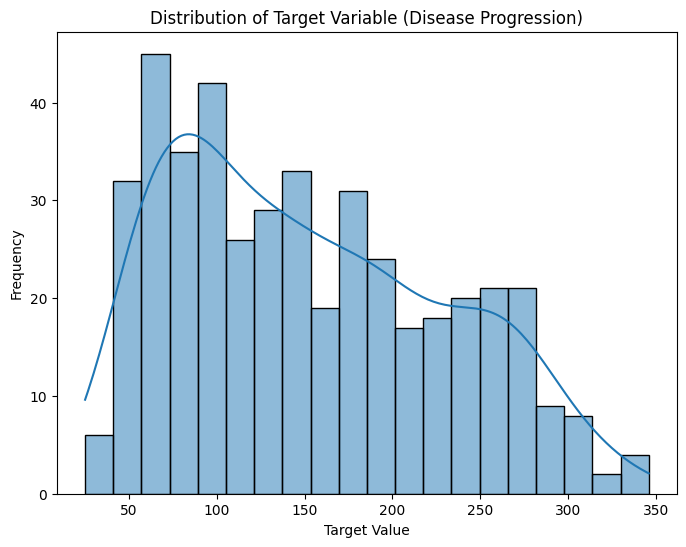

In [7]:
# 히스토그램으로 타겟 값 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=20, kde=True)
plt.title("Distribution of Target Variable (Disease Progression)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

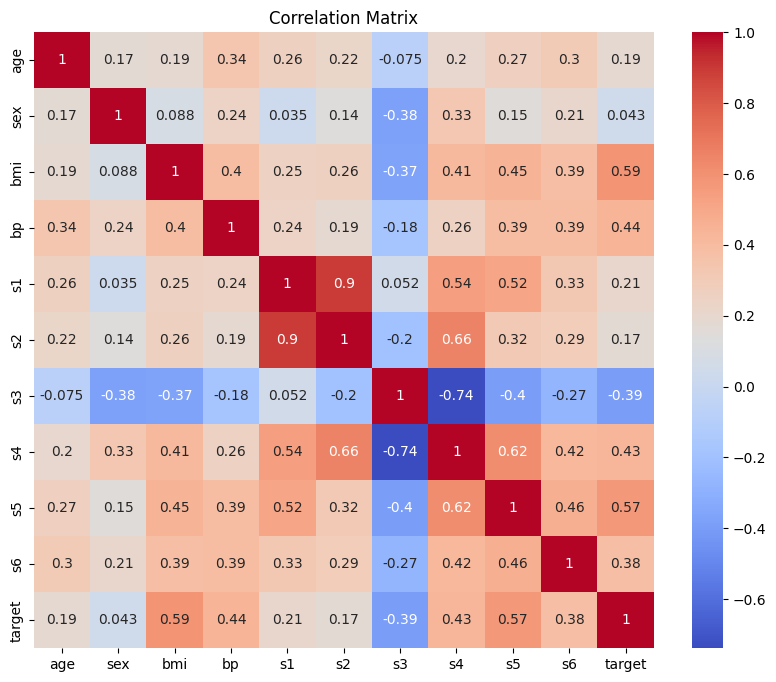

In [8]:
# 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Adjusted R2 :  0.5065592904853231
sorted coefficients(abs)
s1       792.175639
s5       751.273700
bmi      519.845920
s2       476.739021
bp       324.384646
sex      239.815644
s4       177.063238
const    152.133484
s3       101.043268
s6        67.626692
age       10.009866
dtype: float64



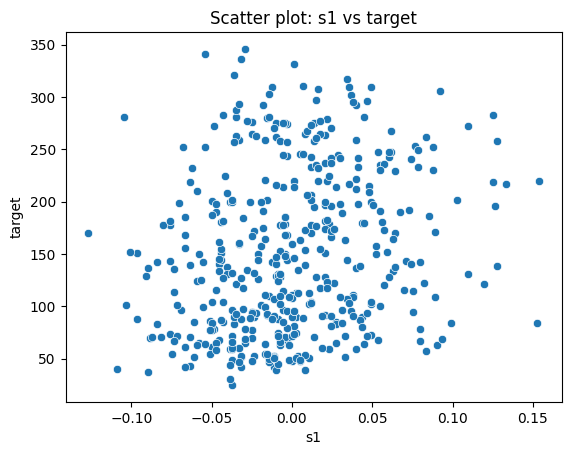

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64


In [56]:
# Q1-1: 어떤 피처(특성)가 가장 중요한지, 직접 데이터를 분석해보세요.
# 직접 데이터 분석? -> 간단하게 선형회귀 적용 후 계수로 판단 (naive method)
# 반응 var : target, 예측 var : all features

import statsmodels.api as sm

X_sm = df.drop(columns = ["target"])
y_sm = df["target"]
X_sm_const = sm.add_constant(X_sm)

ols_model = sm.OLS(y_sm, X_sm_const).fit()

print("Adjusted R2 : ", ols_model.rsquared_adj) # 0.5정도.. 낫밷 벝 검정 안함
print("sorted coefficients(abs)") 
print(ols_model.params.abs().sort_values(ascending=False))
print()

sns.scatterplot(data=df, x="s1", y="target")
plt.title("Scatter plot: s1 vs target")
plt.xlabel("s1")
plt.ylabel("target")
plt.show()

# 선형회귀 상으로는 s1 feature이 가장 중요, but 엄밀하지 않고 scatter plot보았을 때
# 뚜렷한 선형성 가진다고 보기 어렵다.

# Q1-2: 어떤 피처가 'target'과 가장 높은 상관관계를 가지나요?
target_corr = correlation_matrix["target"].drop("target") # target 관련 계수만 drop
sort_corr = target_corr.abs().sort_values(ascending=False)
print(sort_corr)

# 히트맵 상으로나, 정량적 상관계수로나 BMI가 target과 가장 높은 상관관계를 가진다. 


## 2. 데이터 전처리: 데이터 분할 및 스케일링


In [42]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Q2: 데이터 분할 비율을 70:30 또는 90:10으로 변경하면 결과는 어떻게 달라질까요?

# 데이터를 70:30으로 분할하면 test data가 많아 평가의 신뢰도가 높아지지만, 
# 모델이 학습할 data가 줄어들어 성능이 떨어질 수 있다. 
# 이와 반대로, 데이터를 90:10으로 분할하면 train data가 많아 모델의 성능이 높아질 수 있으나,
# 평가의 신뢰도가 낮아진다. 


In [44]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Q3: 스케일링을 하지 않고 학습하면 어떤 결과가 나올까요? 한 번 실험해 보세요.
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)  # 학습 진행

coef_unscaled = pd.Series(model_unscaled.coef_, index=feature_names, name="coef")
print(coef_unscaled)
print(coef) # scaled model의 coef

# 스케일링을 하지 않을 경우, 회귀계수에 차이가 있으나 의미하는 바는 달라지지 않는다. 


age     37.904021
sex   -241.964362
bmi    542.428759
bp     347.703844
s1    -931.488846
s2     518.062277
s3     163.419983
s4     275.317902
s5     736.198859
s6      48.670657
Name: coef, dtype: float64
age     1.753758
sex   -11.511809
bmi    25.607121
bp     16.828872
s1    -44.448856
s2     24.640954
s3      7.676978
s4     13.138784
s5     35.161195
s6      2.351364
Name: coef, dtype: float64


## 3. 모델 적합 (선형 회귀)

In [46]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # 학습 진행

# 모델의 가중치 출력
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Model Intercept: 153.73654390934846


In [ ]:
# Q4: 모델의 계수를 분석해보세요. 어떤 피처가 타겟에 가장 큰 영향을 미치는지 확인하세요.


coef = pd.Series(model.coef_, index=feature_names, name="coef")
print(coef.sort_values(ascending=False))

# s5 피쳐가 타겟에 가장 큰 영향을 미친다. 


s5     35.161195
bmi    25.607121
s2     24.640954
bp     16.828872
s4     13.138784
s3      7.676978
s6      2.351364
age     1.753758
sex   -11.511809
s1    -44.448856
Name: coef, dtype: float64


In [59]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)

## 4. 모델 평가 Evaluation

In [60]:
# 모델 평가

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
R² Score: 0.45


In [ ]:
# (선택) Q5: MSE가 높거나 R² 점수가 낮다면, 데이터를 더 분석하거나 다른 모델을 시도해보세요.
# (선택) Q6: 선형 회귀 외에 Decision Tree, Random Forest를 사용해 결과를 비교해보세요.

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_forest = RandomForestRegressor(n_estimators=200, random_state=42)

# Decision Tree method
model_tree.fit(X_train_scaled, y_train)
pred_tree = model_tree.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, pred_tree)
r2_tree = r2_score(y_test, pred_tree)

print(f"MSE of Decision Tree: {mse_tree:.2f}")
print(f"R² Score of Decision Tree: {r2_tree:.2f}")

# Random Forest method
model_forest.fit(X_train_scaled, y_train)
pred_forest = model_forest.predict(X_test_scaled)
mse_forest = mean_squared_error(y_test, pred_forest)
r2_forest = r2_score(y_test, pred_forest)

print(f"MSE of Random Forest: {mse_forest:.2f}")
print(f"R² Score of Random Forest: {r2_forest:.2f}")

# Decision  Tree 나 Random Forest method는 Linear Regression에 비해 MSE, R2 부분에서 발전이 없다


MSE of Decision Tree: 4887.00
R² Score of Decision Tree: 0.08
MSE of Random Forest: 2980.54
R² Score of Random Forest: 0.44


# 2. **분류 - with Iris dataset**

In [2]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. 데이터 로드 및 탐색

In [6]:
iris = load_iris()
X, y = iris.data, iris.target

feature_names = iris.feature_names
class_names = iris.target_names


In [7]:
# 데이터 크기와 피처 정보 출력
print(f"Dataset Shape: {X.shape}")  # (샘플 수, 피쳐 수) 
print(f"Feature Names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")  # 클래스가 몇 개이고, 어떤 게 있는지 확인해 보세요
print(f"First 5 Samples:\n{X[:5]}")

Dataset Shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
First 5 Samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
# Q1: 각 클래스에 몇 개의 데이터가 있는지 확인해 보세요. 클래스 별 데이터가 균등하게 분포되어 있나요?
unique, counts = np.unique(y, return_counts=True) # np.unique <- y 안 unique value return, return_counts=T <- unique value freq.
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)} # zip(x,y) <- x,y를 짝지어 묶음, {} <- 딕셔너리 만듬, int()는 정수값으로 보기 편하게
print(f"Class Distribution: {class_distribution}")
# 각 종별로(y, target) 50개씩 균등하게 분포되어 있다. 

Class Distribution: {0: 50, 1: 50, 2: 50}


In [10]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


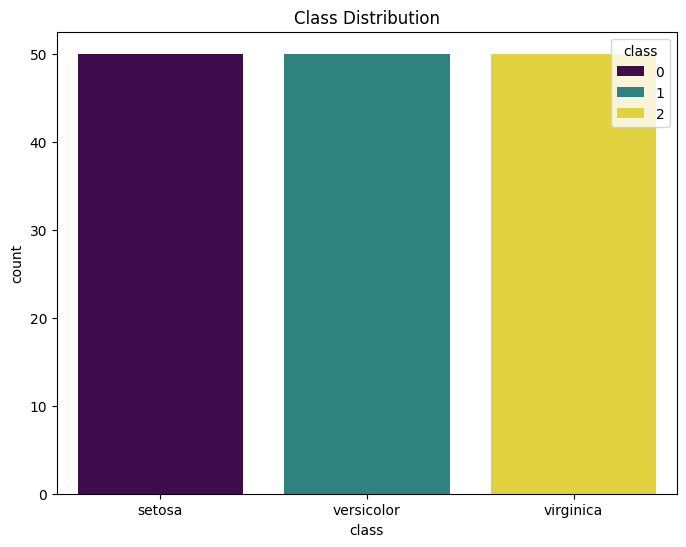

In [12]:
# 클래스별 데이터 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis', hue='class')
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=class_names)
plt.show()

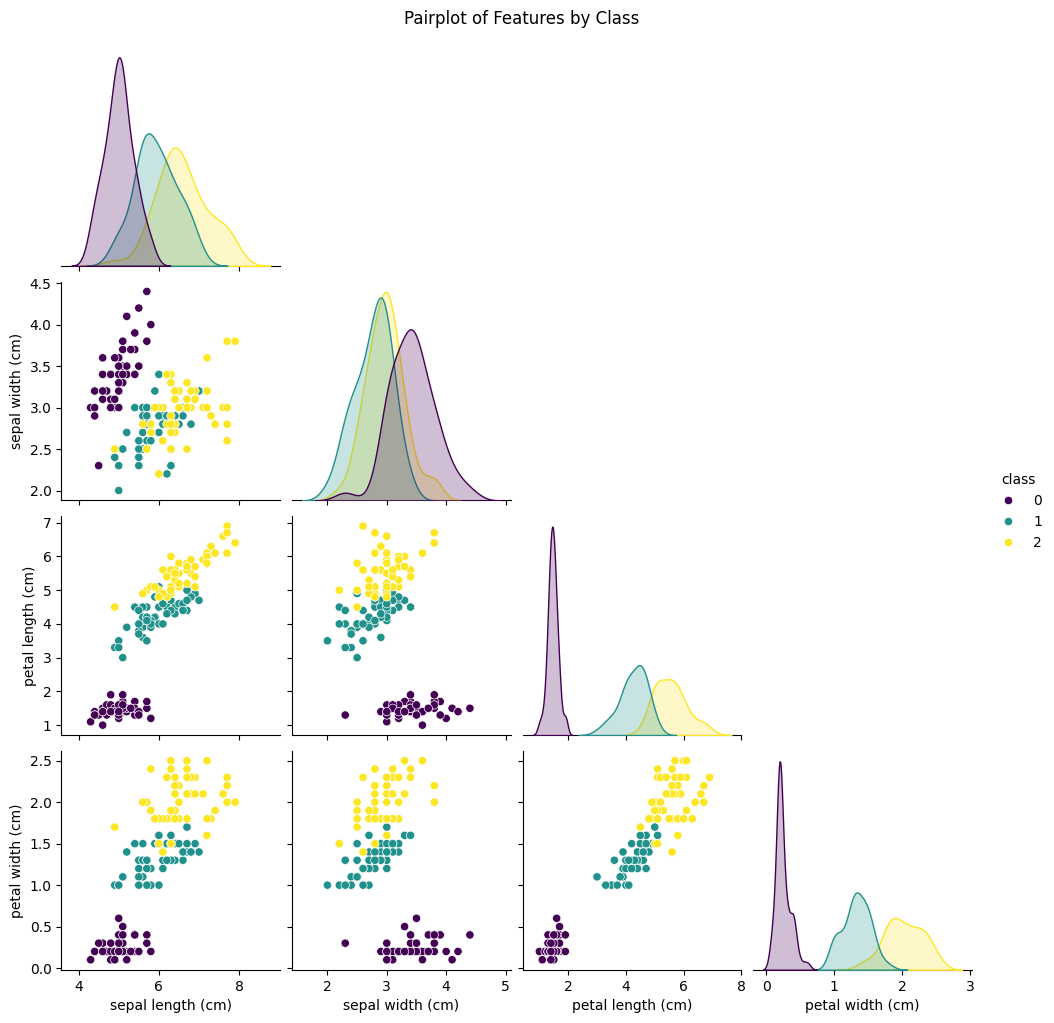

In [ ]:
# 피처 간 산점도 행렬
sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde', corner=True) # plot이 예쁘군요
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

## 2. 데이터 전처리: 데이터 분할 및 스케일링

In [18]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Q2: stratify를 제외하면 클래스 비율이 어떻게 달라질까요? 확인해 보세요.
# stratify=y 옵션은 y(class)의 분포를 train과 test에 똑같이 유지하여 분할

X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.2, random_state=42) # stratify option omit
# 한번에 보기 쉽게 위에서 본 np.uniqe 활용해 함수를 정의하여 해봅시다 feat gpt

def class_dist_st(title, y_data): # 함수 정의
    unique, counts = np.unique(y_data, return_counts=True)
    print(f"\n{title}") # 줄 바꿔서 예쁘게 출력
    for k, v in zip(unique, counts): # for 반복문
        print(f"Class {k} ({class_names[k]}) : {v}")

class_dist_st("stratisfy=y - Train", y_train)
class_dist_st("stratisfy=y - Test", y_test)
class_dist_st("stratisfy X - Train", y_train0)
class_dist_st("stratisfy X - Test", y_test0)

# stratify = y 옵션 적용시 train, test 모두 클래스 비율 동일
# 옵션 적용 안할경우 train, test 내 클래스 비율 차이 보임




stratisfy=y - Train
Class 0 (setosa) : 40
Class 1 (versicolor) : 40
Class 2 (virginica) : 40

stratisfy=y - Test
Class 0 (setosa) : 10
Class 1 (versicolor) : 10
Class 2 (virginica) : 10

stratisfy X - Train
Class 0 (setosa) : 40
Class 1 (versicolor) : 41
Class 2 (virginica) : 39

stratisfy X - Test
Class 0 (setosa) : 10
Class 1 (versicolor) : 9
Class 2 (virginica) : 11


In [23]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Q3: 스케일링을 하지 않고 학습하면 정확도에 어떤 영향을 미칠까요?

# 일반적 선형, 로지스틱 회귀는 큰 영향 받지 않지만, 
# SVM(support vector medthod, 클래스분류)과 같이 거리 기반 모델은 스케일링을 안할 경우 스케일이 다른 변수에 과도한 영향을
# 받을 수 있기 때문에 정확도에 악영향을 미친다. 따라서 거리 기반 모델에서는 스케일링이 필수이다. 
# 추가로, Ridge, Lasso 등의 회귀도 스케일링이 필수이다. (Penalty differ by scale)

## 3. 모델 적합 (SVM)

In [30]:
model = SVC(kernel='linear', C=0.1)  # 선형 커널 사용
model.fit(X_train, y_train)  # 모델 학습

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",0.1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [37]:
# Q4: C 값을 조정해보세요 (예: 0.1, 10). 모델의 성능에 어떤 영향을 미칠까요?
# C <- regularization parameter, 클수록 오분류에 대해 더 강한 페널티, 마진 좁아지고 경계 빡빡함
model_10 = SVC(kernel='linear', C=10)  # 선형 커널 사용
model_10.fit(X_train, y_train)  # 모델 학습

print(f"Score of C=0.1 : {model.score(X_test, y_test):.3f}")
print(f"Score of C=10 : {model_10.score(X_test, y_test):.3f}")

# C=10일때의 score가 0.967로 모델의 성능이 더 높다


Score of C=0.1 : 0.933
Score of C=10 : 0.967


In [35]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation 

In [ ]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names)) #편리한 함수네여

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



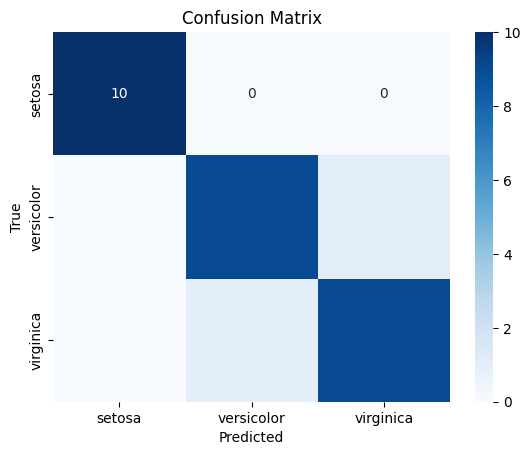

In [37]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Q6: Confusion Matrix를 보고 결과를 해석해보세요.

# 전체적으로 분류 성능이 좋으며, 
# Setosa는 오분류 없이 완벽하게 예측하였으나, Versicolor와 Virginica를 혼동해서 오분류를
# 한 경향이 있다. 
# 앞선 pair plot을 보았을 때, setosa는 다른 종에 비해 petal length와 width
# 에 확연한 차이를 보였으나 versicolor와 virginica는 일부 비슷한 구간이 존재하기 때문에
# 경계가 겹친 것으로 추정된다. 